In [1]:
import pandas as pd 
import numpy as np 
import math
import statistics as sta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
abalone = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data/abalone.csv', header = None)

In [3]:
X = abalone.drop(7, axis = 1)
y = abalone[7]

In [4]:
#null model values
null_test_MSE = []
null_train_MSE = []

#OLS model values
ols_test_MSE = []
ols_train_MSE = []
ols_test_r2 = []
ols_train_r2 = []
ols_det = []

#regression tree models
rt_test_MSE_perdepth = []
rt_train_MSE_perdepth = []
rt_test_r2_perdepth = []
rt_train_r2_perdepth = []

#random forest regression models
rf_test_MSE_pertrees = []
rf_train_MSE_pertrees = []
rf_test_r2_pertrees = [] 
rf_train_r2_pertrees = []

In [5]:
def linear_regressor(x):
    est = 0
    for i in range(len(x.index)):
        est += final[i]*x[i]

    return est

In [6]:
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = i)

    #null model
    avg = y_train.mean()
    null_test_MSE.append(sum((y_test - avg)**2)/len(y_test))
    null_train_MSE.append(sum((y_train - avg)**2)/len(y_train))

    #ols model
    X_transpose = np.transpose(X_train)
    X_Xt = X_transpose.dot(X_train)
    placeholder = X_Xt + 0.001*(np.identity(7))
    inverse = np.linalg.inv(placeholder)
    next = inverse.dot(X_transpose)
    final = next.dot(y_train)

    reg_train = []
    for i in range(len(X_train.index)):
        reg_train.append(linear_regressor(X_train.iloc[i]))   
    ols_train_MSE.append((sum((reg_train - y_train)**2)/len(X_train.index)))
    ols_train_r2.append(1 - ((sum((reg_train - y_train)**2))/sum((avg - y_train)**2)))

    reg_test = []
    for i in range(len(X_test.index)):
        reg_test.append(linear_regressor(X_test.iloc[i]))
    ols_test_MSE.append((sum((reg_test - y_test)**2)/len(X_test.index)))
    ols_test_r2.append(1 - ((sum((reg_test - y_test)**2))/sum((avg - y_test)**2)))
    
    ols_det.append(math.log(np.linalg.det(placeholder)))

    #regression tree model
    DTRs = []
    for j in range(1,8):
        DTRs.append(DecisionTreeRegressor(max_depth=j, random_state=j).fit(X_train, y_train))
        
    R2_DTR_train = []
    for tree in DTRs:
        R2_DTR_train.append(1 - (sum(((y_train - tree.predict(X_train))**2))/(sum((y_train - avg)**2))))
    rt_train_r2_perdepth.append(R2_DTR_train)

    R2_DTR_test = []
    for tree in DTRs:
        R2_DTR_test.append(1 - (sum(((y_test - tree.predict(X_test))**2))/(sum((y_test - y_test.mean())**2))))
    rt_test_r2_perdepth.append(R2_DTR_test)

    MSE_DTR_test = []
    for tree in DTRs:
        MSE_DTR_test.append((sum(((y_test - tree.predict(X_test))**2))/len(y_test.index)))
    rt_test_MSE_perdepth.append(MSE_DTR_test)

    MSE_DTR_train = []
    for tree in DTRs:
        MSE_DTR_train.append((sum(((y_train - tree.predict(X_train))**2))/len(y_train.index)))
    rt_train_MSE_perdepth.append(MSE_DTR_train)

    #random forest regression model
    ntrees = [10,30,100,300]
    RFRs = []
    for n in ntrees:
        RFRs.append(RandomForestRegressor(n_estimators=n, random_state=n).fit(X_train, y_train))

    R2_RFR_test = []
    for forest in RFRs:
        R2_RFR_test.append(forest.score(X_test, y_test))
    rf_test_r2_pertrees.append(R2_RFR_test)

    R2_RFR_train = []
    for forest in RFRs:
        R2_RFR_train.append(forest.score(X_train, y_train))
    rf_train_r2_pertrees.append(R2_RFR_train)

    MSE_RFR_train = []
    for forest in RFRs:
        MSE_RFR_train.append((sum(((y_train - forest.predict(X_train))**2))/len(y_train.index)))
    rf_train_MSE_pertrees.append(MSE_RFR_train)

    MSE_RFR_test = []
    for forest in RFRs:
        MSE_RFR_test.append((sum(((y_test - forest.predict(X_test))**2))/len(y_test.index)))
    rf_test_MSE_pertrees.append(MSE_RFR_test)

In [8]:
avg_null_test_MSE = sta.mean(null_test_MSE)
avg_null_train_MSE = sta.mean(null_train_MSE)


avg_ols_test_MSE = sta.mean(ols_test_MSE)
avg_ols_train_MSE = sta.mean(ols_train_MSE)
avg_ols_test_r2 = sta.mean(ols_test_r2)
avg_ols_train_r2 = sta.mean(ols_train_r2)
avg_ols_det = sta.mean(ols_det)

ols_test_MSE_sd = sta.stdev(ols_test_MSE)
ols_train_MSE_sd = sta.stdev(ols_train_MSE)
ols_test_r2_sd = sta.stdev(ols_test_r2)
ols_train_r2_sd = sta.stdev(ols_train_r2)
ols_det_sd = sta.stdev(ols_det)

## Decision Tree Regression

In [12]:
avg_rt_test_MSE = []
n = 0
while n < 7:
    mean_perdepth = []
    for s in rt_test_MSE_perdepth:
        mean_perdepth.append(s[n])
    avg_rt_test_MSE.append(sta.mean(mean_perdepth))
    n += 1

In [14]:
avg_rt_train_MSE = []
n = 0
while n < 7:
    mean_perdepth = []
    for s in rt_train_MSE_perdepth:
        mean_perdepth.append(s[n])
    avg_rt_train_MSE.append(sta.mean(mean_perdepth))
    n += 1

In [15]:
avg_rt_test_r2 = []
n = 0
while n < 7:
    mean_perdepth = []
    for s in rt_test_r2_perdepth:
        mean_perdepth.append(s[n])
    avg_rt_test_r2.append(sta.mean(mean_perdepth))
    n += 1

In [16]:
avg_rt_train_r2 = []
n = 0
while n < 7:
    mean_perdepth = []
    for s in rt_train_r2_perdepth:
        mean_perdepth.append(s[n])
    avg_rt_train_r2.append(sta.mean(mean_perdepth))
    n += 1

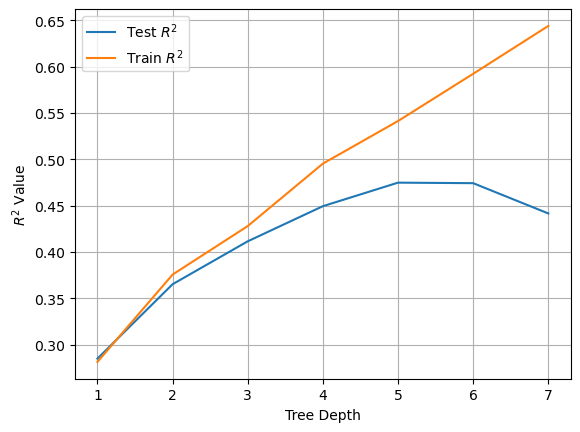

In [17]:
plt.plot(range(1,8), avg_rt_test_r2, label = 'Test $R^2$')
plt.plot(range(1,8), avg_rt_train_r2, label = 'Train $R^2$')
plt.xlabel('Tree Depth')
plt.ylabel('$R^2$ Value')
plt.grid()
plt.legend()
plt.show()

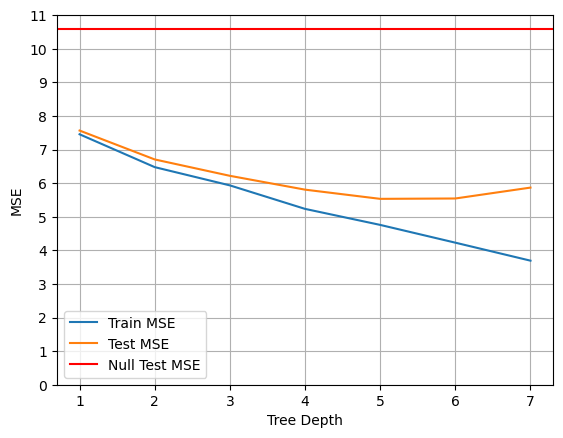

In [29]:
plt.plot(range(1,8), avg_rt_train_MSE, label = 'Train MSE')
plt.plot(range(1,8), avg_rt_test_MSE, label = 'Test MSE')
plt.axhline(avg_null_test_MSE, label = 'Null Test MSE', color = 'Red')
plt.ylim(0,11)
plt.yticks(range(12))
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.grid()
plt.legend()
plt.show()

## Random Forest Regression

In [30]:
avg_rf_test_MSE = []
n = 0
while n < 4:
    mean_pertrees = []
    for s in rf_test_MSE_pertrees:
        mean_pertrees.append(s[n])
    avg_rf_test_MSE.append(sta.mean(mean_pertrees))
    n += 1

In [34]:
avg_rf_train_MSE = []
n = 0
while n < 4:
    mean_pertrees = []
    for s in rf_train_MSE_pertrees:
        mean_pertrees.append(s[n])
    avg_rf_train_MSE.append(sta.mean(mean_pertrees))
    n += 1

In [35]:
avg_rf_test_r2 = []
n = 0
while n < 4:
    mean_pertrees = []
    for s in rf_test_r2_pertrees:
        mean_pertrees.append(s[n])
    avg_rf_test_r2.append(sta.mean(mean_pertrees))
    n += 1

In [36]:
avg_rf_train_r2 = []
n = 0
while n < 4:
    mean_pertrees = []
    for s in rf_train_r2_pertrees:
        mean_pertrees.append(s[n])
    avg_rf_train_r2.append(sta.mean(mean_pertrees))
    n += 1

In [47]:
rf_test_MSE_sd = []
n = 0
while n < 4:
    sd_pertrees = []
    for s in rf_test_MSE_pertrees:
        sd_pertrees.append(s[n])
    rf_test_MSE_sd.append(sta.stdev(sd_pertrees))
    n += 1

In [48]:
rf_train_MSE_sd = []
n = 0
while n < 4:
    sd_pertrees = []
    for s in rf_train_MSE_pertrees:
        sd_pertrees.append(s[n])
    rf_train_MSE_sd.append(sta.stdev(sd_pertrees))
    n += 1

In [49]:
rf_train_r2_sd = []
n = 0
while n < 4:
    sd_pertrees = []
    for s in rf_train_r2_pertrees:
        sd_pertrees.append(s[n])
    rf_train_r2_sd.append(sta.stdev(sd_pertrees))
    n += 1

In [50]:
rf_test_r2_sd = []
n = 0
while n < 4:
    sd_pertrees = []
    for s in rf_test_r2_pertrees:
        sd_pertrees.append(s[n])
    rf_test_r2_sd.append(sta.stdev(sd_pertrees))
    n += 1

# Summary of all models

## (a)

In [37]:
avg_null_test_MSE

10.592415826871628

In [38]:
avg_null_train_MSE

10.370737549204406

## (b)

In [42]:
print(avg_ols_test_MSE, 
avg_ols_train_MSE,
avg_ols_test_r2,
avg_ols_train_r2,
avg_ols_det,
ols_test_MSE_sd,
ols_train_MSE_sd,
ols_test_r2_sd,
ols_train_r2_sd,
ols_det_sd)

5.16284055062402 5.047016141555081 0.5117826041190287 0.5133276110555854 18.254963707756865 0.6568963427473147 0.0633913365496351 0.051427388863834335 0.005391413727045635 0.1783904995934694


## (c)

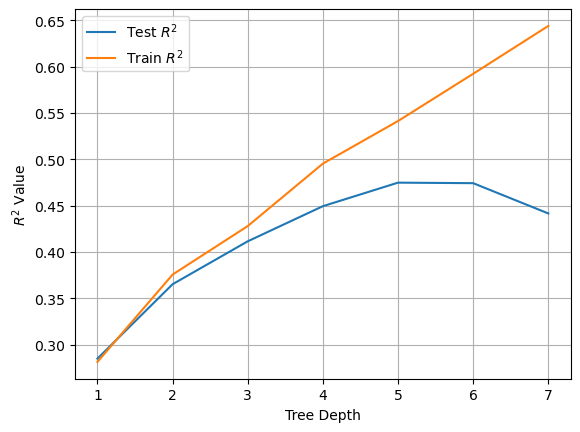

In [44]:
plt.plot(range(1,8), avg_rt_test_r2, label = 'Test $R^2$')
plt.plot(range(1,8), avg_rt_train_r2, label = 'Train $R^2$')
plt.xlabel('Tree Depth')
plt.ylabel('$R^2$ Value')
plt.grid()
plt.legend()
plt.show()

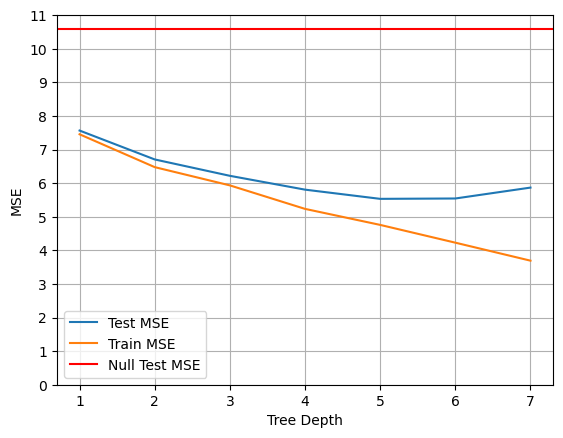

In [62]:
plt.plot(range(1,8), avg_rt_test_MSE, label = 'Test MSE')
plt.plot(range(1,8), avg_rt_train_MSE, label = 'Train MSE')
plt.axhline(avg_null_test_MSE, label = 'Null Test MSE', color = 'Red')
plt.ylim(0,11)
plt.yticks(range(12))
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.grid()
plt.legend()
plt.show()

## (d)

In [56]:
avg_rf_test_MSE

[5.198718899521532, 4.91601754385965, 4.802879569377991, 4.764881415470494]

In [57]:
avg_rf_train_MSE

[0.8991481777068421,
 0.7363647542195038,
 0.6686719699388164,
 0.6523520844787326]

In [54]:
avg_rf_test_r2

[0.5062283806337413, 0.5333405800136073, 0.544300746864312, 0.5479659791369135]

In [55]:
avg_rf_train_r2

[0.9132996140271192,
 0.9289938896961794,
 0.9355206048457254,
 0.9370949789894153]

In [58]:
rf_test_MSE_sd

[0.3855161101859222,
 0.36466296663987197,
 0.39454795259957365,
 0.3935998252870376]

In [59]:
rf_train_MSE_sd

[0.03876842629326749,
 0.01638616409944517,
 0.011075348756466418,
 0.007659330450788853]

In [60]:
rf_test_r2_sd

[0.043437661160336045,
 0.03868432928870099,
 0.037910603471653245,
 0.03692658780447659]

In [61]:
rf_train_r2_sd

[0.003631792908767047,
 0.0015268849073797651,
 0.001056082010161788,
 0.0006519877572369619]